In [0]:
%%capture
!pip install hyperas
!pip install hyperopt

# Import dataset from Google Drive

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# pietro
output_preprocessing = pd.read_csv("/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/output_preprocessing_50_clusters.csv")
# carlo
#output_preprocessing = pd.read_csv("/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/output_preprocessing_50_clusters.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
output_preprocessing.head()

,total_distance,total_travel_time,number_of_steps,maximum_temperature,minimum_temperature,average_temperature,precipitation,snow_fall,snow_depth,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,pickup_cluster,dropoff_cluster,JFK_start,JFK_end,guardia_start,guardia_end,pickup_hour,pickup_minute,pickup_day_week
0,2009.1,164.9,5.0,10.555556,4.444444,7.500000,0.7366,0.0,0.00,2,1,0,455,14,8,False,False,False,False,17,24,0
1,2513.2,332.0,6.0,7.777778,2.777778,5.277778,0.8890,0.0,0.00,1,1,0,663,36,38,False,False,False,False,0,43,6
2,1779.4,235.8,4.0,28.333333,18.888889,23.611111,1.0160,0.0,0.00,2,1,0,429,38,12,False,False,False,False,19,32,2
3,1614.9,140.1,5.0,12.777778,3.333333,8.055556,0.0000,0.0,0.00,2,1,0,435,32,46,False,False,False,False,13,30,5
4,1393.5,189.4,5.0,3.888889,-2.222222,0.833333,0.0000,0.0,15.24,2,6,0,443,36,42,False,False,False,False,22,1,5


# Keras train test definition

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

cols = list(output_preprocessing.columns.values)
cols.remove('trip_duration')

target = output_preprocessing.loc[:, 'trip_duration']
features = output_preprocessing.loc[:, cols]

train_features, test_features, train_target, test_target = \
    train_test_split(features, target, test_size=0.20, random_state=0)

train_x, train_y = np.array(train_features), np.array(train_target)
test_x, test_y = np.array(test_features), np.array(test_target)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled_x = scaler.fit_transform(train_x)
test_scaled_x = scaler.transform(test_x)

# Model 

In [11]:
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

from keras import backend as K

def root_mean_squared_error_logarithmic(y_true, y_pred):
    return K.sqrt(K.mean(K.square(K.log(y_pred + 1) - K.log(y_true + 1)), axis=-1))
num_features = train_scaled_x.shape[1]

model = Sequential()
model.add(Dense(128, input_dim=num_features, activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(optimizer='adam', loss=root_mean_squared_error_logarithmic, metrics=['mse', 'mae', 'mape', 'cosine'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               2816      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 9,121
Trainable params: 9,121
Non-trainable params: 0
_________________________________________________________________


# Testing the model

In [12]:
history = model.fit(train_scaled_x, train_y, epochs=100, 
          batch_size=256, verbose=True)

Epoch 1/100
1156982/1156982 [==============================] - 10s 9us/step - loss: 5.7804 - mean_squared_error: 1135357.5826 - mean_absolute_error: 837.9207 - mean_absolute_percentage_error: 99.7932 - cosine_proximity: -1.0000
Epoch 2/100
1156982/1156982 [==============================] - 10s 9us/step - loss: 5.7804 - mean_squared_error: 1135357.5820 - mean_absolute_error: 837.9207 - mean_absolute_percentage_error: 99.7932 - cosine_proximity: -1.0000
Epoch 3/100
1156982/1156982 [==============================] - 10s 9us/step - loss: 5.7804 - mean_squared_error: 1135357.5817 - mean_absolute_error: 837.9207 - mean_absolute_percentage_error: 99.7932 - cosine_proximity: -1.0000
Epoch 4/100
1156982/1156982 [==============================] - 10s 9us/step - loss: 5.7804 - mean_squared_error: 1135357.5816 - mean_absolute_error: 837.9207 - mean_absolute_percentage_error: 99.7932 - cosine_proximity: -1.0000
Epoch 5/100
1156982/1156982 [==============================] - 10s 9us/step - loss: 5.78

KeyboardInterrupt: ignored

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,cosine_proximity,epoch
95,0.119146,0.119146,0.252424,4.039335,-1.0,95
96,0.119115,0.119115,0.252345,4.038100,-1.0,96
97,0.119652,0.119652,0.252901,4.046836,-1.0,97
98,0.119539,0.119539,0.252887,4.046399,-1.0,98
99,0.119423,0.119423,0.252728,4.044076,-1.0,99


AttributeError: ignored

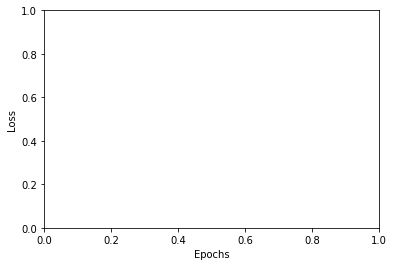

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
n_epochs = 25
x_plot = list(range(1,n_epochs+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('cosine_proximity')
    plt.plot(x_plot, network_history.history['cosine_proximity'])
    plt.plot(x_plot, network_history.history['val_cosine_proximity'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('mean_absolute_error')
    plt.plot(x_plot, network_history.history['mean_absolute_error'])
    plt.plot(x_plot, network_history.history['val_mean_absolute_error'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('mean_absolute_percentage_error')
    plt.plot(x_plot, network_history.history['mean_absolute_percentage_error'])
    plt.plot(x_plot, network_history.history['val_mean_absolute_percentage_error'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('mean_squared_error')
    plt.plot(x_plot, network_history.history['mean_squared_error'])
    plt.plot(x_plot, network_history.history['val_mean_squared_error'])
    plt.legend(['Training', 'Validation'])

plot_history(hist)

In [0]:
import tensorflow as tf
!pip install git+https://github.com/tensorflow/docs
print(tf.__version__)
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mean_absolute_error")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-chkovulx
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-chkovulx
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=77807 sha256=880a70601f106f932e594dc5e64f46317eb131cabbca919b0348123142c0a75f
  Stored in directory: /tmp/pip-ephem-wheel-cache-nqo5nmun/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
1.15.0


KeyError: ignored

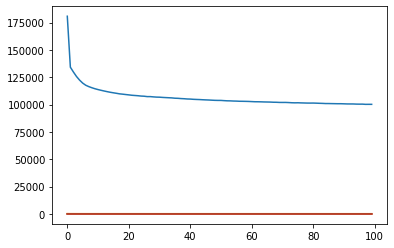

In [0]:
from matplotlib import pyplot

# plot metrics
pyplot.plot(history.history['mean_squared_error'])
pyplot.plot(history.history['mean_absolute_error'])
pyplot.plot(history.history['mean_absolute_percentage_error'])
pyplot.plot(history.history['cosine_proximity'])
pyplot.show()

In [0]:
pred = model.predict(test_scaled_x)
pred = pred.flatten()
#pred = np.exp(pred)+1

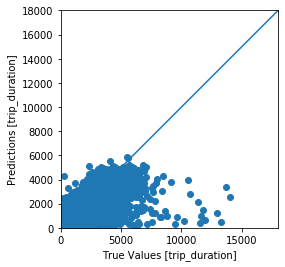

In [0]:
import matplotlib.pyplot as plt

a = plt.axes(aspect='equal')
plt.scatter(test_y, pred)
plt.xlabel('True Values [trip_duration]')
plt.ylabel('Predictions [trip_duration]')
lims = [0, 18000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [0]:
# Root Mean Squared Logarithmic Error
np.sqrt(np.mean(np.square(np.log(pred + 1) - np.log(test_y + 1)), axis=-1))

0.3764929970029048

# Prediction


In [0]:
# carlo
#test_weather_osm = pd.read_csv("/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/test_weather_osm_50_clusters.csv")
# pietro
test_weather_osm = pd.read_csv("/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/test_weather_osm_50_clusters.csv")
test_weather_osm = test_weather_osm.drop(columns=['id'])

In [0]:
test_weather_osm.head()

,total_distance,total_travel_time,number_of_steps,maximum_temperature,minimum_temperature,average_temperature,precipitation,snow_fall,snow_depth,vendor_id,passenger_count,store_and_fwd_flag,pickup_cluster,dropoff_cluster,JFK_start,JFK_end,guardia_start,guardia_end,pickup_hour,pickup_minute,pickup_day_week
0,1497.1,200.2,7,13.333333,10.555556,11.944444,1.5494,0.0,0.00,1,1,0,6,48,False,False,False,False,13,2,5
1,1427.1,141.5,2,30.555556,22.777778,26.666667,0.0000,0.0,0.00,2,1,0,37,36,False,False,False,False,18,45,4
2,2312.3,324.6,9,2.222222,-2.777778,-0.277778,0.0000,0.0,0.00,2,5,0,6,23,False,False,False,False,0,48,3
3,931.8,84.2,4,5.000000,-1.111111,1.944444,0.0000,0.0,15.24,1,1,0,23,39,False,False,False,False,8,20,4
4,2501.7,294.7,8,30.555556,22.777778,26.666667,0.0000,0.0,0.00,2,3,0,29,46,False,False,False,False,13,37,4


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

test_weather_osm_array = np.array(test_weather_osm)

test_weather_osm_scaled_x = scaler.transform(test_weather_osm_array)

In [0]:
pred = model.predict(test_weather_osm_scaled_x)
pred = pred.flatten()
#pred = np.exp(pred)+1

In [0]:
#test_weather_osm = pd.read_csv("/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/test_weather_osm_50_clusters.csv")
test_weather_osm = pd.read_csv("/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/test_weather_osm_50_clusters.csv")

test_weather_osm['trip_duration'] = pred.tolist()

test_weather_osm[['id', 'trip_duration']].to_csv('neural_submission_50_clusters.csv', index=False)
# pietro
!cp /content/neural_submission_50_clusters.csv "/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/"
# carlo
#!cp /content/neural_submission_50_clusters.csv "/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/"


In [0]:
test_weather_osm.shape

(625134, 23)